# Data Cleaning

In [55]:
## Import libraries
import pandas as pd
import numpy as np

## Import Data
client = pd.read_csv('client.csv')
invoice = pd.read_csv('invoice.csv')

## Merge Data
df = pd.merge(client, invoice, on = 'id', how = 'outer')

In [56]:
##Check and remove empty rows
bef_shape = df.shape

print(df.isna())
print(df.isna().sum())
print(df.isnull().mean())

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)

aft_shape = df.shape

##Number of empty rows removed
print("Shape before removal of empty rows: ", bef_shape)
print("Shape after removal of empty rows: ", aft_shape)

#Note: There are rows are removed (as seen in change of df.shape)
#Note: OR consider running the code below for an inner join
#an inner join will ensure there is no empty values in the rows
#df = pd.merge(client, invoice, on = 'id')
#Note: df created with an inner join and df created with an outer join produces
#same results for evaluation metrics in regards to the different algorithms we used
#this suggests that the content of df created from either methods, are the same
#and the different join methods can be used interchangeably

##Check datatype of each column
print(df.dtypes)

##Check for whitespaces in columns of strings - id
df['id'] = df['id'].str.strip()

##Convert date columns to datetime (Especially since format of date_x and date_y are not the same)
df['date_x'] = pd.to_datetime(df['date_x'])
df['date_y'] = pd.to_datetime(df['date_y'],format = "%d/%m/%y")

##Check for duplicate rows
df = df.drop_duplicates()
#Note: No rows are removed (as seen drop df.shape not changing after this is ran)
# -> Data does not have any duplicate rows

##Convert counter_type into 1 and 0
def new_cat(x):
  if x == "ELEC":
    return 1
  else:
    return 0

df['counter_type'] = df['counter_type'].apply(new_cat)

##Convert date columns into one column - difference in the two dates
df['date'] = (df['date_y']-df['date_x']).dt.days
#Note: 'date' column is now an integer

##Drop Columns
df = df.drop(['date_y', 'date_x', 'Unnamed: 0_x', 'Unnamed: 0_y'],axis =1)
#Remove unnecessary columns like date columns which have been replaced

##Group By ID
import statistics as st
data = pd.DataFrame()
for feature in df:
    if feature in ['dis', 'catg', 'region', 'target', 'counter_coefficient', 'reading_remarque', 'tarif_type', 'counter_statue']:
        new_feature = df.groupby(['id'])[feature].aggregate(st.mode)
        data[feature] = new_feature
        #data[feature] = data[feature].astype('category')
    elif feature not in ['id']:
        new_feature = df.groupby(['id'])[feature].aggregate('mean')
        data[feature] = new_feature
    else:
        continue

#Important to groupby id so the dataframe will now only have one row for each client
#Since each client is either a fraud client or a non-fraud client

print(data.dtypes)

'''
##Standardization
X = data.drop(['target'], axis = 1)
#Remove 'target' AKA y column
y = data['target']

for col in X:
  X[col] = (X[col]-X[col].mean())/X[col].std()
'''
data

         Unnamed: 0_x  region  date_x    dis     id   catg  target  \
0               False   False   False  False  False  False   False   
1               False   False   False  False  False  False   False   
2               False   False   False  False  False  False   False   
3               False   False   False  False  False  False   False   
4               False   False   False  False  False  False   False   
...               ...     ...     ...    ...    ...    ...     ...   
1152460         False   False   False  False  False  False   False   
1152461         False   False   False  False  False  False   False   
1152462         False   False   False  False  False  False   False   
1152463         False   False   False  False  False  False   False   
1152464         False   False   False  False  False  False   False   

         Unnamed: 0_y  date_y  tarif_type  ...  reading_remarque  \
0               False   False       False  ...             False   
1               False  

,region,dis,catg,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,consommation_level_4,old_index,new_index,months_number,counter_type,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,date
id,,,,,,,,,,,,,,,,,,,
train_Client_0,101,60,11,0,11.0,1.335667e+06,0.0,203.685714,6.0,0.000000,9444.542857,9807.514286,4.628571,1.000000,1.0,352.400000,10.571429,0.000000,6089.771429
train_Client_1,107,69,11,0,11.0,6.789020e+05,0.0,203.000000,6.0,0.000000,14330.756757,14888.297297,4.324324,1.000000,1.0,557.540541,0.000000,0.000000,3583.864865
train_Client_10,301,62,11,0,11.0,5.727650e+05,0.0,203.222222,6.0,0.000000,32873.000000,33709.500000,6.444444,1.000000,1.0,798.611111,37.888889,0.000000,9221.222222
train_Client_100,105,69,11,0,11.0,2.078000e+03,0.0,413.000000,6.0,0.000000,94.150000,95.350000,4.200000,1.000000,1.0,1.200000,0.000000,0.000000,4444.750000
train_Client_1000,303,62,11,0,11.0,1.957500e+04,0.0,207.000000,9.0,36.714286,6900.428571,7823.071429,3.714286,1.000000,1.0,663.714286,104.857143,117.357143,964.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_Client_128435,311,63,11,0,40.0,2.482496e+05,0.0,102.777778,6.0,0.000000,8432.444444,8748.061728,4.123457,0.493827,1.0,313.777778,1.839506,0.000000,4617.753086
train_Client_128436,101,60,11,0,40.0,1.453362e+06,0.0,103.500000,6.0,0.000000,23867.750000,24128.214286,5.000000,0.500000,1.0,248.250000,12.214286,0.000000,1080.357143
train_Client_128437,302,62,11,0,10.0,9.525416e+06,0.0,202.000000,6.0,0.000000,21189.100000,22003.100000,5.600000,1.000000,1.0,280.000000,534.000000,0.000000,10599.900000


## Imbalanced Data

Dealing with Imbalanced Data

1. SMOTE
2. Oversampling
3. Undersampling

0    29846
1     1757
Name: target, dtype: int64
Percentage of fraud cases:  5.559598772268456
Percentage of non-fraud cases:  94.44040122773154


<AxesSubplot:>

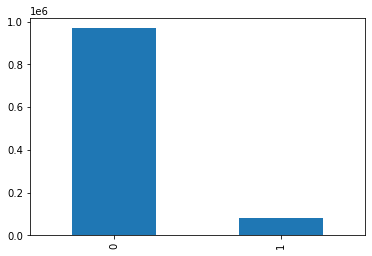

In [3]:
##Check for class imbalance
occur = data['target'].value_counts()
print(occur)

ratio = occur/len(data.index)
print("Percentage of fraud cases: ", ratio[1]*100)
print("Percentage of non-fraud cases: ", ratio[0]*100)

#There is a class imbalance problem

df['target'].value_counts().plot(kind = 'bar')

Data Visualization of Class Imbalance
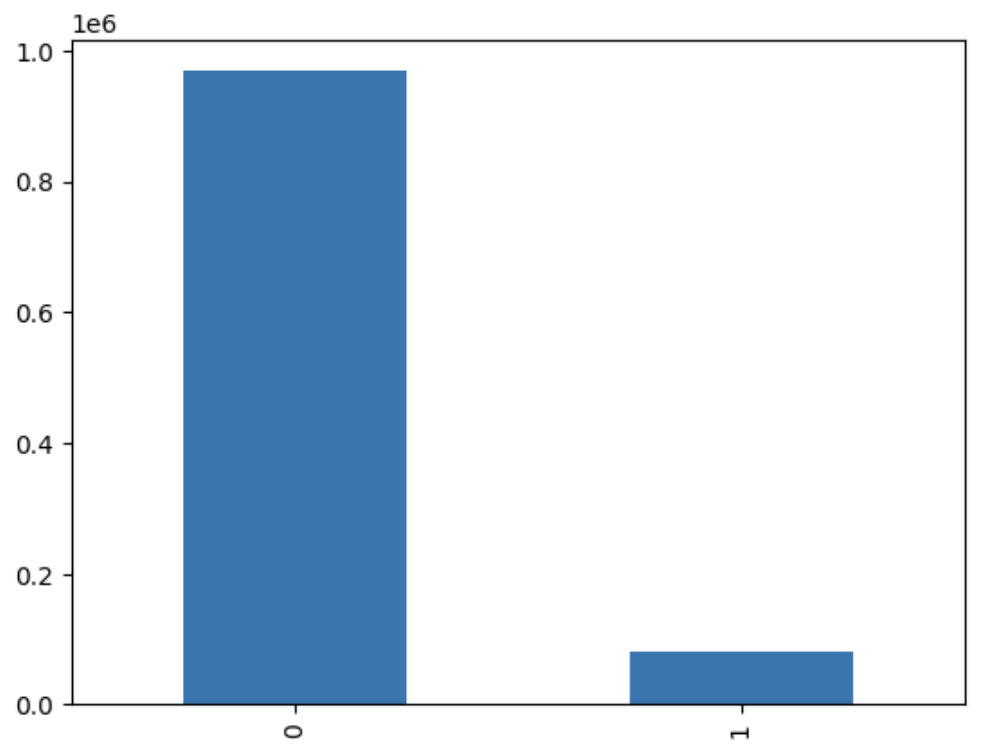

## Data Visualization

In [ ]:
#Data Visualization
#Note: This is for understanding the distribution of each column

#Plot graphs of features

df['counter_type'].value_counts().plot(kind = 'bar') #Number of ELEC is more than twice number of GAZ

df['dis'].value_counts().plot(kind = 'bar') #Number of 62 counter type is more than twice the second most popular counter type of 63

df['catg'].value_counts().plot(kind = 'bar') #Number of 11 category is overwhelmingly more than number of 51 and 12 category

df['region'].value_counts().plot(kind = 'bar') #Number of 101 category is a little more than twice number of second most popular region of 311

df['tarif_type'].value_counts().plot(kind = 'bar') #Extreme difference between largest and smallest count
df['tarif_type'].value_counts()

df['counter_code'].value_counts().plot(kind = 'bar') #Extreme difference between largest and smallest count
df['counter_code'].value_counts()

df['reading_remarque'].value_counts().plot(kind = 'bar') #Value for reading_remarque = 7 is very small as compared to other values
df['reading_remarque'].value_counts()

df['counter_coefficient'].value_counts().plot(kind = 'bar') #All coefficients are 1

#Note: Bar graphs that cannot be plotted: old_index, new_index, months_number, consommation_level_1, consommation_level_2, consommation_level_3, consommation_level_4
#Note: Through df['target'].value_counts().plot(kind = 'bar'), class imbalance is further corroborated


Distribution of Counter Type



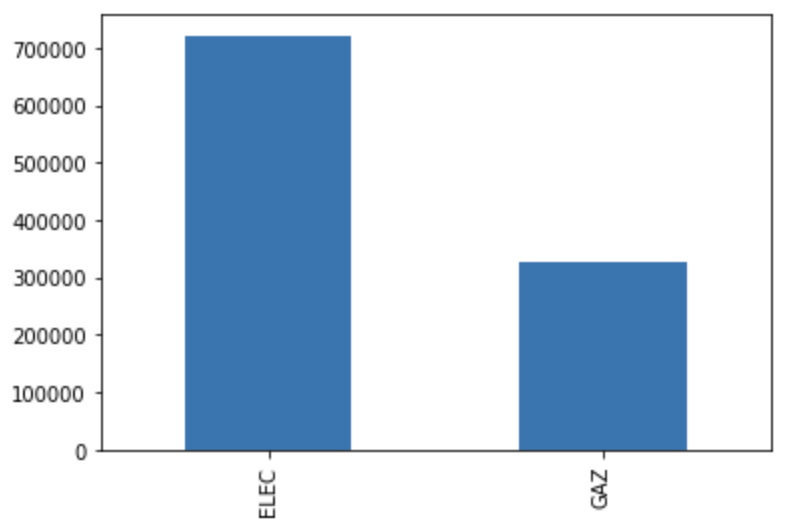

Distribution of District



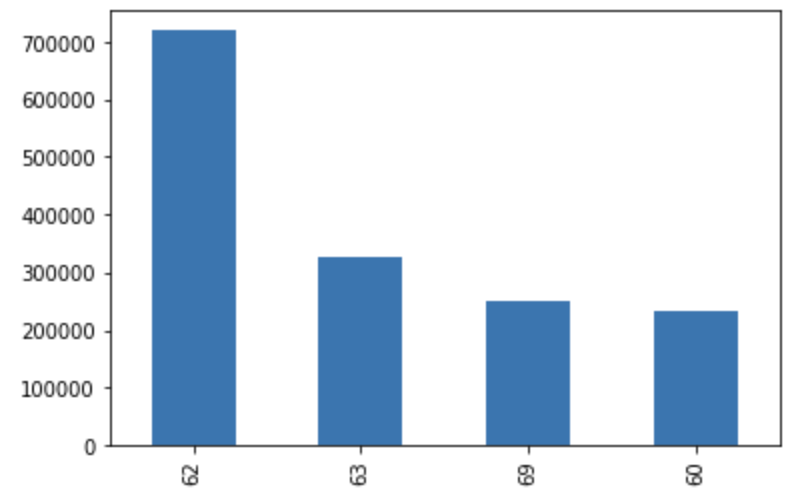

Distribution of Category



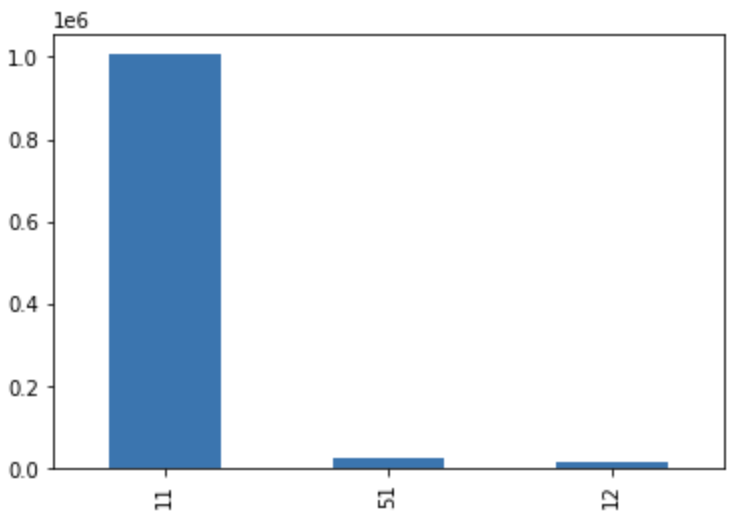

Distribution of Region




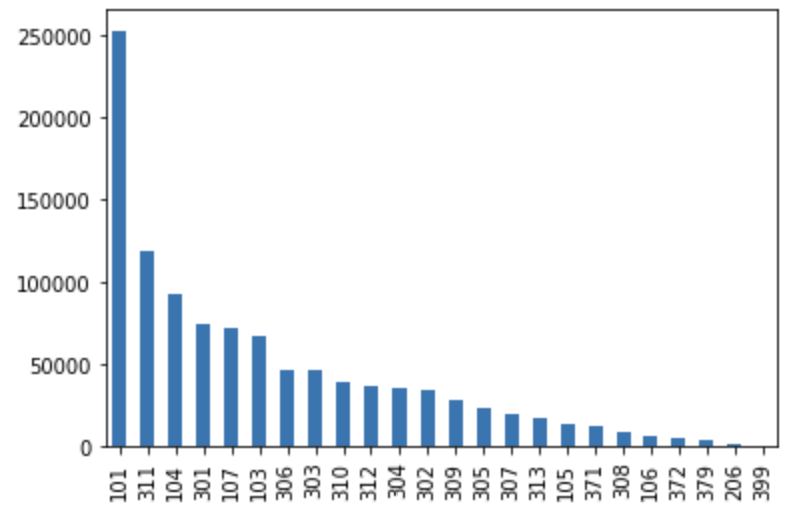

Distribution of Counter Coefficient




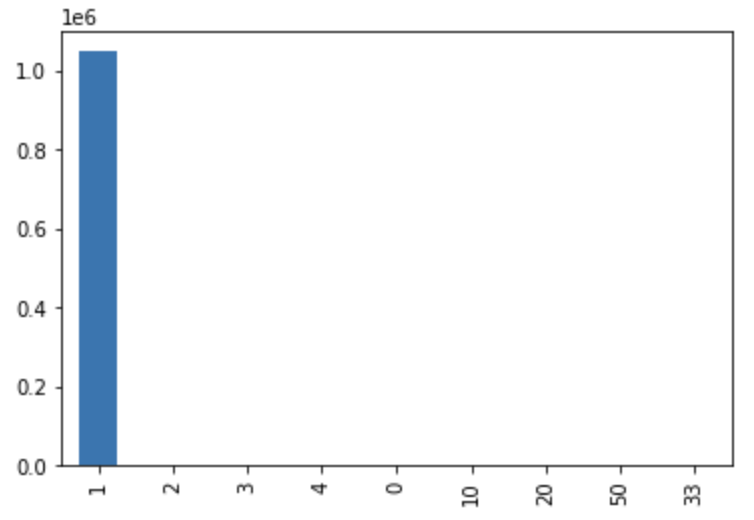

Distribution of Reading Remarque




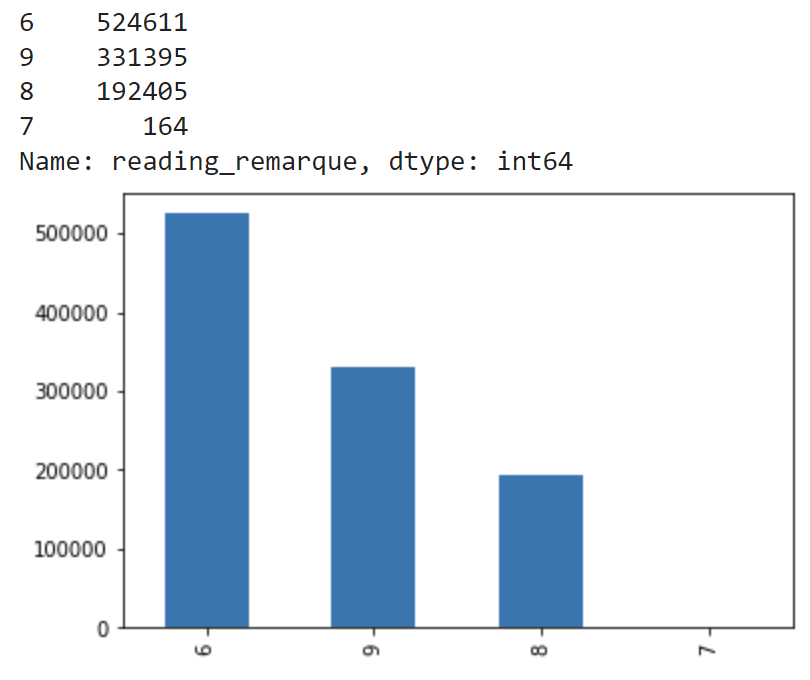

Distribution of Counter Code


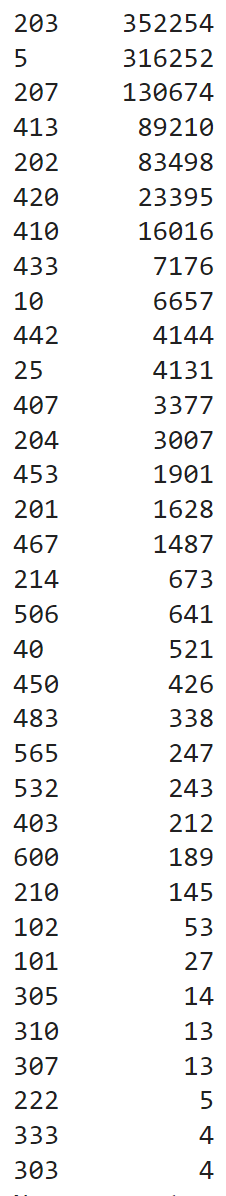

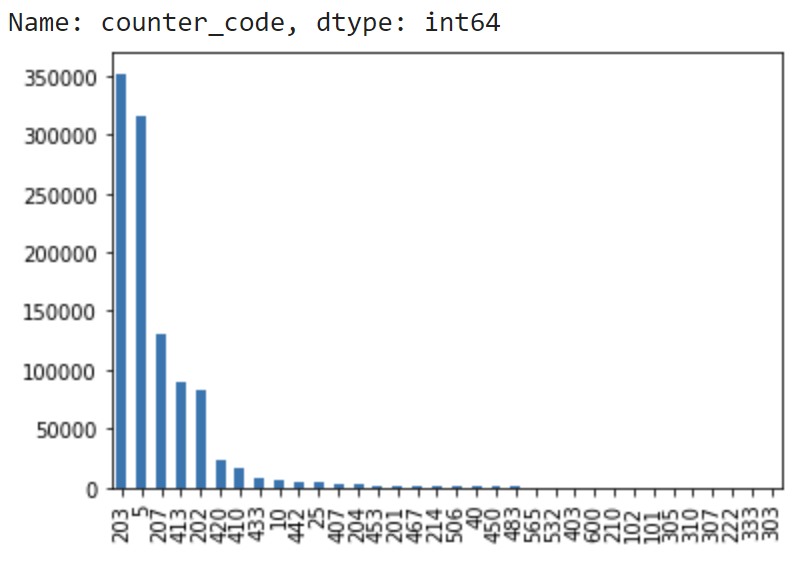

Distribution of Tarif Type


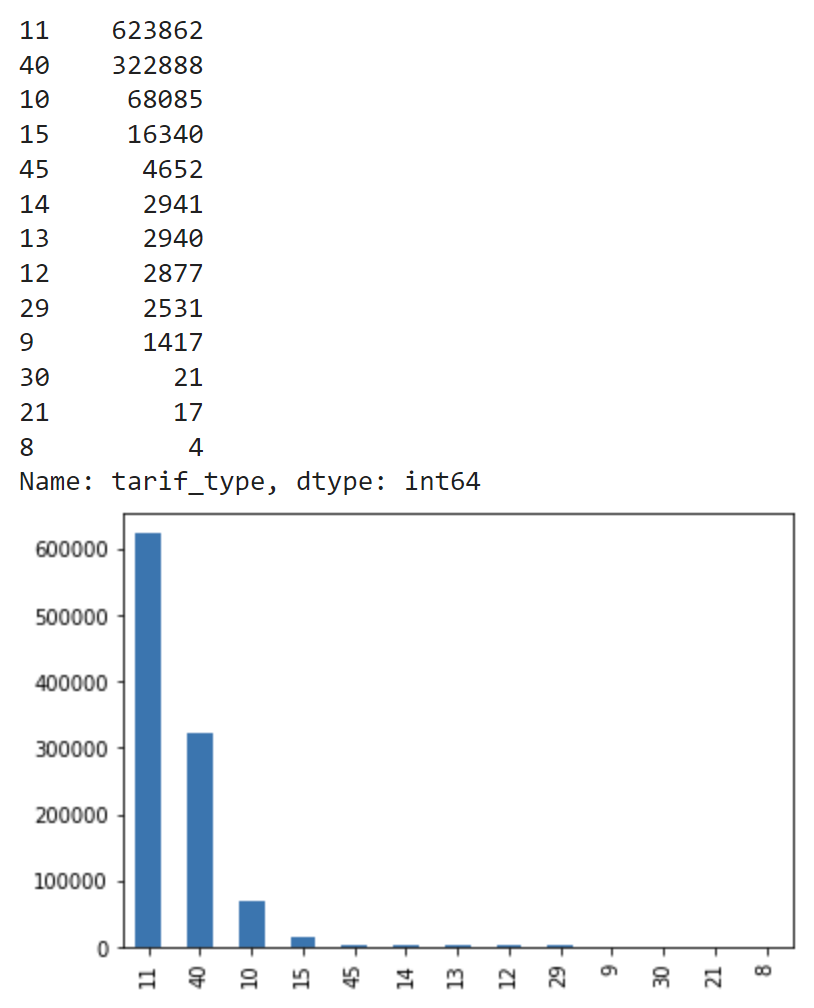

# Logistic Regression

For evaluation purposes, we look at F1 score and AUC ROC (area under the receiver operating characteristic curve) score.
- F1 score looks at the mode's ability to catch positive cases (recall: TP/TP+FN; catching a fradulent transaction) and its accuracy with cases captured (precision: TP/TP+FP; correctly flagging fradulent transaction). This is important as we want to catch as many fradulent transactions to prevent loss of profit and we want to reduce wrongly flagging of fradulent transactions to increase efficiency for workers who are dispatched to investigate the "fraud". 
- AUC ROC indicates how well the model distinguishes between fraud and not fraud to provide insight on how well the model is doing in differentiating different cases. 

Note: We do not look at accuracy as it can be misleading for imbalanced data where there originally exists more legitimate transactions than fraudulent transactions, as the value for TP+TN/TP+TN+FP+FN can be high even if the model only predicts observations as legitimate. 

Note: It is important to split data into testing and training before attempting hyperparameter tuning via cross validation to prevent data leakage.

In [64]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

#Split Train and Test
X = data.drop(['target'], axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

## Hyperparameter Tuning
We would like to test different solvers with different penalties and different c values for each sampling method via cross validation for hyperparameter tuning. 

In [65]:
## SMOTE
solvers = ["lbfgs", "newton-cg", "saga"]
penalty = ["l1", "l2", "elasticnet"]
c_val = [100, 10, 1, 0.1, 0.01]

smote_sampling = SMOTE(random_state = 42)
standardization = StandardScaler()
pipeline_smote = Pipeline([("scaling", standardization),
                           ("sampling", smote_sampling), 
                          ("logistic", LogisticRegression(random_state = 42))])
grid = {
    "logistic__solver": solvers,
    "logistic__penalty": penalty,
    "logistic__C": c_val,
    "logistic__l1_ratio": [0, 0.5, 1.0]
}

grid_search_smote = GridSearchCV(pipeline_smote, param_grid = grid, scoring = {"ROC AUC":"roc_auc", "F1":"f1"}, refit = "F1", cv = 5)
grid_search_smote.fit(X_train, y_train)

print("Best parameters:", grid_search_smote.best_params_)
print("Best F1 Score:", grid_search_smote.best_score_)

Best parameters: {'logistic__C': 0.01, 'logistic__l1_ratio': 0.5, 'logistic__penalty': 'elasticnet', 'logistic__solver': 'saga'}
Best F1 Score: 0.16217944039290386


In [66]:
## Oversampling
solvers = ["lbfgs", "newton-cg", "saga"]
penalty = ["l1", "l2", "elasticnet"]
c_val = [100, 10, 1, 0.1, 0.01]

over_sampling = RandomOverSampler(random_state = 42)
standardization = StandardScaler()
pipeline_smote = Pipeline([("scaling", standardization),
                           ("sampling", over_sampling), 
                          ("logistic", LogisticRegression(random_state = 42))])
grid = {
    "logistic__solver": solvers,
    "logistic__penalty": penalty,
    "logistic__C": c_val,
    "logistic__l1_ratio": [0, 0.5, 1.0]
}

grid_search_over = GridSearchCV(pipeline_smote, param_grid = grid, scoring = {"ROC AUC":"roc_auc", "F1":"f1"}, refit = "F1", cv = 5)
grid_search_over.fit(X_train, y_train)

print("Best parameters:", grid_search_over.best_params_)
print("Best F1 Score:", grid_search_over.best_score_)

Best parameters: {'logistic__C': 100, 'logistic__l1_ratio': 0, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}
Best F1 Score: 0.16225553116571736


In [67]:
## Undersampling
solvers = ["lbfgs", "newton-cg", "saga"]
penalty = ["l1", "l2", "elasticnet"]
c_val = [100, 10, 1, 0.1, 0.01]

under_sampling = RandomUnderSampler(random_state = 42)
standardization = StandardScaler()
pipeline_smote = Pipeline([("scaling", standardization),
                           ("sampling", under_sampling), 
                          ("logistic", LogisticRegression(random_state = 42))])
grid = {
    "logistic__solver": solvers,
    "logistic__penalty": penalty,
    "logistic__C": c_val,
    "logistic__l1_ratio": [0, 0.5, 1.0]
}

grid_search_under = GridSearchCV(pipeline_smote, param_grid = grid, scoring = {"ROC AUC":"roc_auc", "F1":"f1"}, refit = "F1", cv = 5)
grid_search_under.fit(X_train, y_train)

print("Best parameters:", grid_search_under.best_params_)
print("Best F1 Score:", grid_search_under.best_score_)

Best parameters: {'logistic__C': 0.1, 'logistic__l1_ratio': 0, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}
Best F1 Score: 0.16073761613953402


In [68]:
## No sampling
solvers = ["lbfgs", "newton-cg", "saga"]
penalty = ["l1", "l2", "elasticnet"]
c_val = [100, 10, 1, 0.1, 0.01]

standardization = StandardScaler()
pipeline_smote = Pipeline([("scaling", standardization),
                          ("logistic", LogisticRegression(random_state = 42))])
grid = {
    "logistic__solver": solvers,
    "logistic__penalty": penalty,
    "logistic__C": c_val,
    "logistic__l1_ratio": [0, 0.5, 1.0]
}

grid_search_nosampling = GridSearchCV(pipeline_smote, param_grid = grid, scoring = {"ROC AUC":"roc_auc", "F1":"f1"}, refit = "F1", cv = 5)
grid_search_nosampling.fit(X_train, y_train)

print("Best parameters:", grid_search_nosampling.best_params_)
print("Best F1 Score:", grid_search_nosampling.best_score_)

Best parameters: {'logistic__C': 100, 'logistic__l1_ratio': 0, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}
Best F1 Score: 0.0014184397163120566


### Conclusion of Results per Sampling Method

From SMOTE:
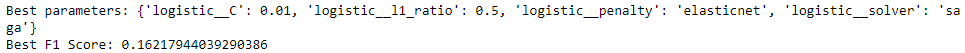

From Oversampling:
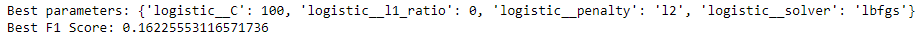

From Undersampling:
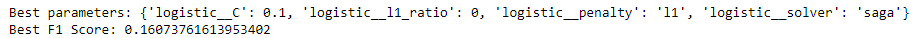

From No Sampling:
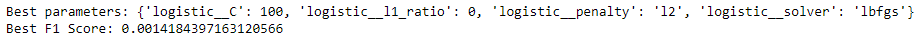

Unsurprisingly, due to the highly imbalanced data, no sampling performed the worst. 

Carrying on, we evaluate each model's performance on the test data. 

## Evaluation of Each LR Model via Test Dataset

In [69]:
## Evaluation via F1 score and ROC AUC score
best_model_smote = grid_search_smote.best_estimator_
y_pred_smote = best_model_smote.predict(X_test)
y_pred_proba_smote = best_model_smote.predict_proba(X_test)[:,1]
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

best_model_over = grid_search_over.best_estimator_
y_pred_over = best_model_over.predict(X_test)
y_pred_proba_over = best_model_over.predict_proba(X_test)[:,1]
f1_over = f1_score(y_test, y_pred_over)
roc_auc_over = roc_auc_score(y_test, y_pred_proba_over)

best_model_under = grid_search_under.best_estimator_
y_pred_under = best_model_under.predict(X_test)
y_pred_proba_under = best_model_under.predict_proba(X_test)[:,1]
f1_under = f1_score(y_test, y_pred_under)
roc_auc_under = roc_auc_score(y_test, y_pred_proba_under)

best_model_nosampling = grid_search_nosampling.best_estimator_
y_pred_nosampling = best_model_nosampling.predict(X_test)
y_pred_proba_nosampling = best_model_nosampling.predict_proba(X_test)[:,1]
f1_nosampling = f1_score(y_test, y_pred_nosampling)
roc_auc_nosampling = roc_auc_score(y_test, y_pred_proba_nosampling)

print("From SMOTE:")
print("f1: ", f1_smote)
print("roc auc: ", roc_auc_smote)

print("From Oversampling:")
print("f1: ", f1_over)
print("roc auc: ", roc_auc_over)

print("From Undersampling:")
print("f1: ", f1_under)
print("roc auc: ", roc_auc_under)

print("From No Sampling:")
print("f1: ", f1_nosampling)
print("roc auc: ", roc_auc_nosampling)

From SMOTE:
f1:  0.15174825174825177
roc auc:  0.6513063894973443
From Oversampling:
f1:  0.1562829989440338
roc auc:  0.6602079724357782
From Undersampling:
f1:  0.15362423368193295
roc auc:  0.6599927462574029
From No Sampling:
f1:  0.0
roc auc:  0.6536557431029792


### Conclusion of Results per Sampling Method

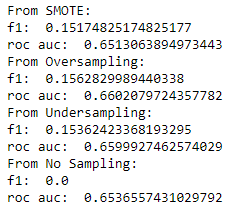

The model with oversampling gave the highest roc auc and highest f1 score. As the model with undersampling gave a roc auc value very close to the model with oversampling, we look closer into the classification report for these 2 models to verify that oversampling is indeed the most suitable model.

In [70]:
## Classification Report for Models with Oversampling and Undersampling
report_over = classification_report(y_test, y_pred_over)
report_under = classification_report(y_test, y_pred_under)

print("oversampling")
print(report_over)

print("undersampling")
print(report_under)

oversampling
              precision    recall  f1-score   support

           0       0.97      0.62      0.76      5970
           1       0.09      0.63      0.16       351

    accuracy                           0.62      6321
   macro avg       0.53      0.63      0.46      6321
weighted avg       0.92      0.62      0.72      6321

undersampling
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      5970
           1       0.09      0.61      0.15       351

    accuracy                           0.63      6321
   macro avg       0.53      0.62      0.46      6321
weighted avg       0.92      0.63      0.73      6321



### Classification Report Comparing Oversampling and Undersampling

Note that the model with oversampling used lbfgs solver with l2 regularization and c = 100 while the model with undersampling used saga solver with l1 regularization and c = 0.1

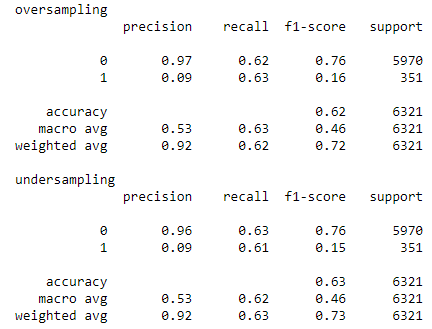

From the classification report, we can see that oversampling performs slightly better than undersampling when it comes to recall and f1-score of fraud cases. Although accuracy is slightly higher for the model that uses undersampling, recall the introduction portion of logistic regression which mentioned that accuracy can be misleading for imbalanced datasets. 

# Conclusion
Thus, we would like to propose the following logistic regression model to analyze this electricity and gas fraud dataset:

Logistic regression with lbfgs solver with l2 regularization, c = 100 along with oversampling